# `matplotlib` Reference

This notebook is meant to serve as a bare-minimum reference, not a substitute for the documentation: https://matplotlib.org/3.1.1/users/index.html

## 1. Basics

### a) Importing

When importing a package, we can import it as is or give it a new alias that we can more easily reference. Common convention is to import `matplotlib` and use the alias `plt`. While you are not required to do this, it will make reading documentation and other code easier.

In [1]:
import matplotlib.pyplot as plt

### b) Anatomy of a figure

The documentation provides this diagram which lays out the different components of a figure:

In [18]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='https://matplotlib.org/3.1.1/_images/anatomy.png')

### c) Creating a figure

There are many ways to create a figure using `matplotlib`. Sometimes we just want to creat an empty figure to fill later:

In [5]:
fig = plt.figure()

We can also create a figure and obtain a reference to the axes object using `plt.subplots`:

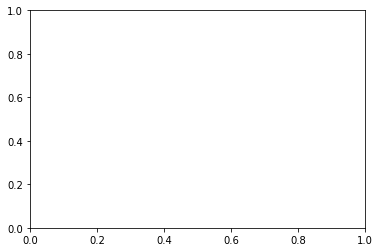

In [19]:
fig, ax = plt.subplots()

We do not need to expicitly create every figure. We can also create a figure by calling any one of the plotting functions:

In [11]:
import numpy as np

In [14]:
x = np.random.normal(size=100).cumsum()

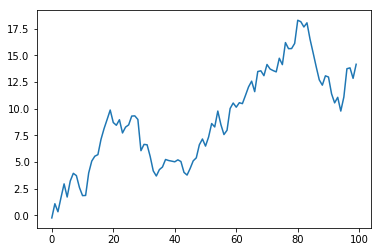

In [22]:
plt.plot(x)
plt.show()

### d) Figure customization

Nearly all of the components labeled in the anatomy of a figure diagram can be modified and customized to change the look of your plot. In the following example we define the figure size (in inches), set a title, and label the axes.

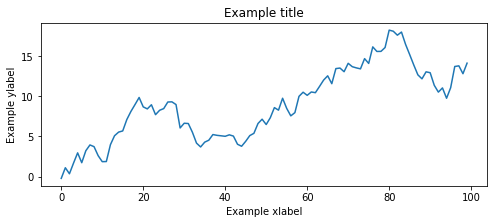

In [21]:
fig = plt.figure(figsize=(8, 3))
plt.plot(x)
plt.title('Example title')
plt.xlabel('Example xlabel')
plt.ylabel('Example ylabel')
plt.show()

We can also define the overall look of our figure using built-in styles found here: https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

In [23]:
plt.style.use('seaborn')

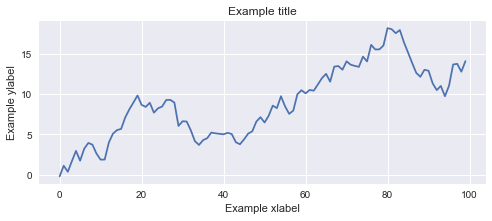

In [24]:
fig = plt.figure(figsize=(8, 3))
plt.plot(x)
plt.title('Example title')
plt.xlabel('Example xlabel')
plt.ylabel('Example ylabel')
plt.show()

## 2. Common plotting functions

In [61]:
x = np.random.normal(scale=0.1, size=10000).cumsum()
y = np.random.normal(scale=0.1, size=10000).cumsum()

### a) `plt.plot`

Use `plt.plot` to plot lines. You can provide a single array of values and the function will assume that the x-axis is the index of the array.

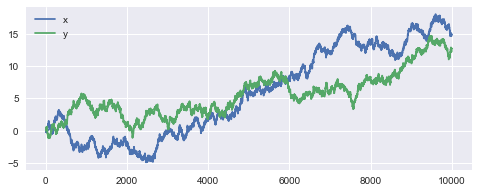

In [62]:
fig = plt.figure(figsize=(8, 3))
plt.plot(x, label='x')
plt.plot(y, label='y')
plt.legend()
plt.show()

Or, we can provide two arguments for the (x, y) coordinates of each point:

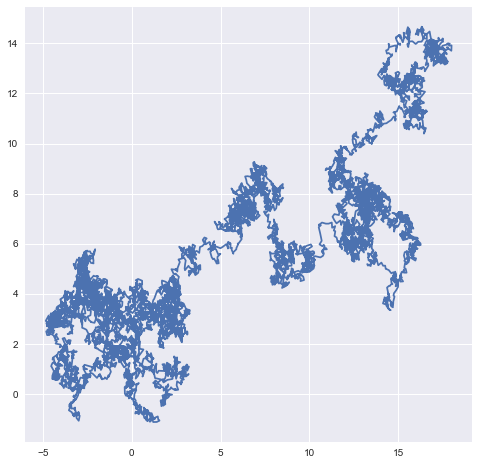

In [63]:
fig = plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.show()

### b) `plt.scatter`

This function will plot each datapoint as a point in a scatter plot. Unlike `plt.plot` you must provide both coordinates of each datapoint.

In [84]:
x = np.random.normal(scale=0.1, size=100).cumsum()
y = np.random.normal(scale=0.1, size=100).cumsum()

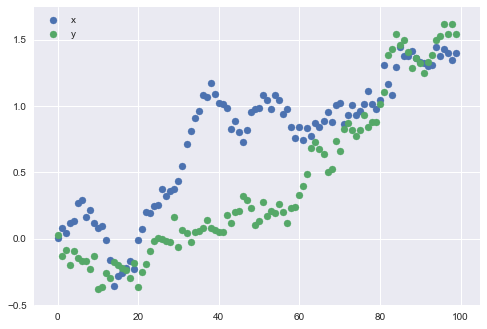

In [54]:
t = np.arange(x.size)
plt.scatter(t, x, label='x')
plt.scatter(t, y, label='y')
plt.legend()
plt.show()

Or, we can provide two arguments for the (x, y) coordinates of each point:

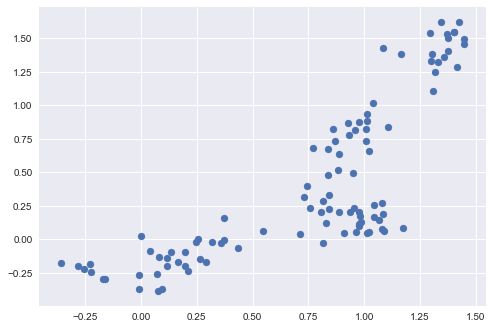

In [55]:
plt.scatter(x, y)
plt.show()

### c) `plt.hist`

This function is used for plotting histograms. It typically accepts a single array of values. we can demonstrate it with some known distributions:

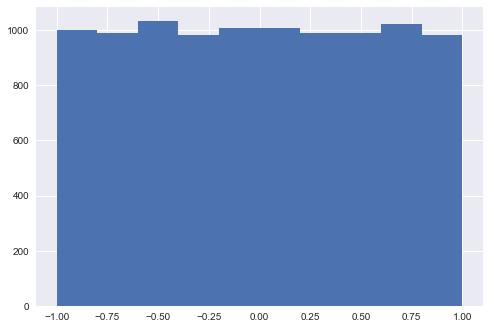

In [45]:
x = np.random.uniform(-1, 1, size=10000)
plt.hist(x)
plt.show()

The two most useful parameters to know are `bins` which sets the number of bins to use and `density` which will normalize each bin count.

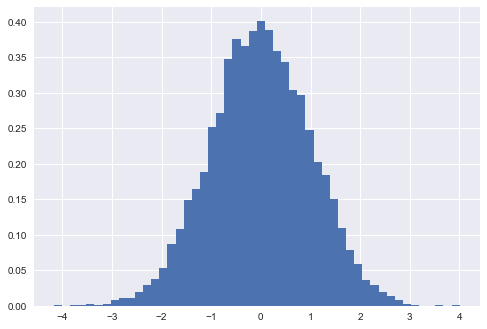

In [49]:
x = np.random.normal(size=10000)
plt.hist(x, bins=50, density=True)
plt.show()

Just like `plot` and `scatter` we can stack multiple calls of this function in one figure:

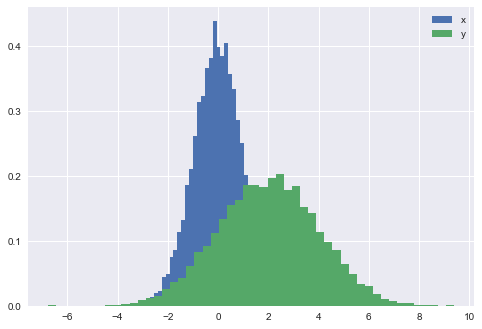

In [50]:
x = np.random.normal(size=10000)
y = np.random.normal(loc=2, scale=2, size=10000)
plt.hist(x, bins=50, density=True, label='x')
plt.hist(y, bins=50, density=True, label='y')
plt.legend()
plt.show()

### d) `plt.stem`

Stem plots are scatter plots where each point has a stem extending to some common line (by default this is the line through the origin)

In [129]:
x = np.random.normal(scale=0.1, size=100).cumsum()

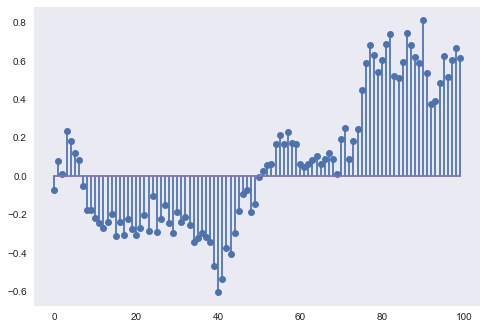

In [133]:
plt.stem(x)
plt.show()

### e) `plt.imshow` and `plt.matshow`

These are two functions for visualizing matrix data (e.g images or other 2D matrices). `imshow` assumes that index (0, 0) corresponds to the bottom left corner while `matshow` assumes that (0, 0) is the top left corner. If you plan on using these functions, I would recommend using a style that does not include a grid by default.

In [66]:
plt.style.use('seaborn-dark')

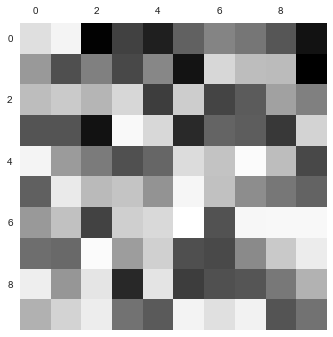

In [67]:
A = np.random.uniform(0, 1, size=(10, 10))
plt.matshow(A)
plt.show()

These functions return an image object which can be used to draw a colorbar attached to the figure. We can also specify different color maps by name which are all listed here: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

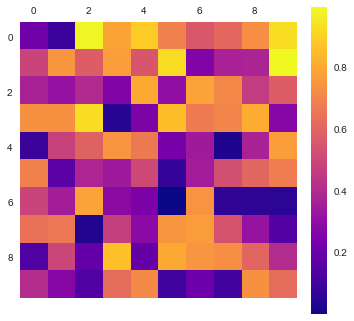

In [81]:
im = plt.matshow(A, cmap='plasma')
plt.colorbar(im, fraction=0.05)
plt.show()

To demonstrate the `imshow` function, we will also make use of `plt.imread` function which can read an image file and return an array. The array will be 2D if the image has only one channel (grayscale) and 3D if the image has multiple channels (e.g RGB or RGBA).

In [127]:
img = plt.imread('bird.jpg')
print(img.shape)

(360, 480, 3)


So we have a 480x360 color image.

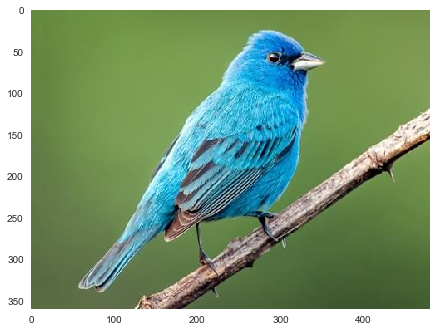

In [128]:
plt.imshow(img)
plt.show()

## 3. Subplots

So far we have only considered a single set of axes in our figure. However, quite often we want to create a figure with multiple plots arranged in a grid. We can do this with subplots. There are a couple different ways of using subplots. We can either create everything at once using `plt.subplots` or we can create the axes as we go using `plt.subplot`.

Note: when dealing with an `axes` object, the syntax for certain functions changes (e.g `plt.title` --> `ax.set_title`)

In [112]:
x = [np.random.normal(scale=i + 1, size=1000).cumsum() for i in range(4)]
y = [np.random.normal(scale=i + 1, size=1000).cumsum() for i in range(4)]

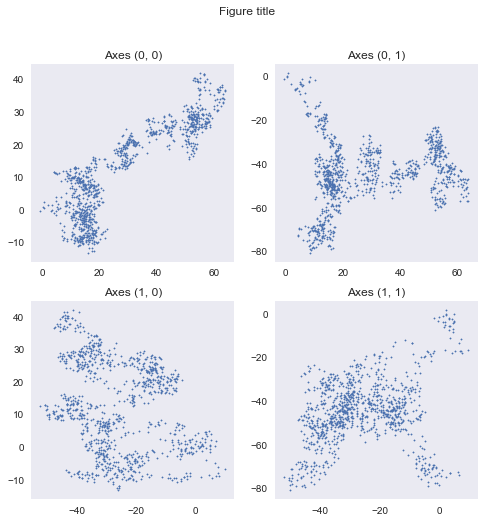

In [125]:
n_cols = 2
n_rows = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(8, 8))

for i in range(n_rows):
    for j in range(n_cols):
        axs[i][j].scatter(x[i], y[j], s=2)
        axs[i][j].set_title('Axes (%d, %d)' % (i, j))

fig.suptitle('Figure title')
plt.show()

Here is an indentical figure as the one above, but created incrementally using `plt.subplot`

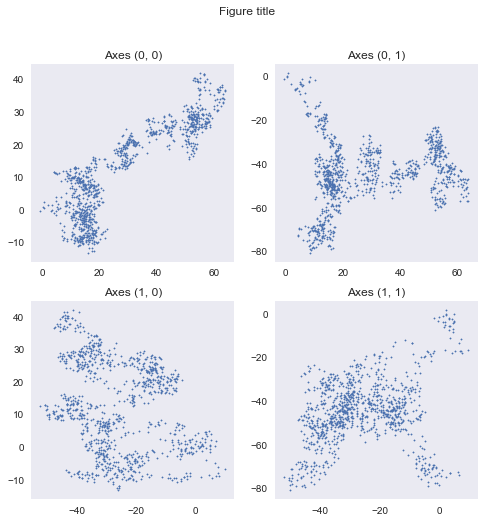

In [126]:
fig = plt.figure(figsize=(8, 8))

for i in range(n_rows):
    for j in range(n_cols):
        ax_index = n_cols * i + j + 1
        ax = plt.subplot(n_rows, n_cols, ax_index)
        ax.scatter(x[i], y[j], s=2)
        ax.set_title('Axes (%d, %d)' % (i, j))
        
fig.suptitle('Figure title')
plt.show()